In [1]:
import warnings
#warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import heron
from heron.likelihood import TimeDomainLikelihoodModelUncertainty
from heron.models.testing import FlatPSD
from heron.models.lalsimulation import IMRPhenomPv2_FakeUncertainty
from heron.detector import AdvancedLIGOHanford, AdvancedLIGOLivingston

/home/daniel/repositories/ligo/heron/heron/models/__init__.py:3: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import antenna, MSUN_SI


In [2]:
test_waveform = IMRPhenomPv2_FakeUncertainty(covariance=1e-10)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import coordinates as coords
import astropy.units as u

In [4]:
loc = {"m1": 20*u.solMass, "m2": 20*u.solMass, "distance": 500*u.Mpc, "inclination": 0, "f_min": 100*u.Hz, "f_ref": 300*u.Hz, "theta_jn": 0,  "phase": 0}
data = test_waveform.time_domain(loc,)
location = coords.SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
position = {"ra": float(location.ra.to(u.radian).value),
            "dec": float(location.dec.to(u.radian).value),
            "psi": 0,
}

In [5]:
injection = test_waveform.time_domain(loc, times=np.linspace(-.05, .05, 1000)).project(detector=AdvancedLIGOHanford(), **position)

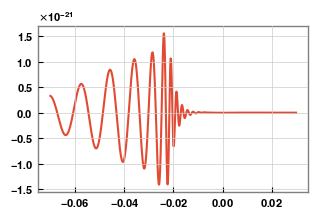

In [6]:
plt.plot(injection.times, injection)

In [7]:
likelihood = TimeDomainLikelihoodModelUncertainty(data=injection,
                                  psd=FlatPSD(),
                                  detector=AdvancedLIGOHanford(),
                                  waveform=IMRPhenomPv2_FakeUncertainty(covariance=1e-20),
)                                  

In [8]:
widths = np.linspace(10, 30, 20)
likelihoods = []
for w in widths:
    loc.update(position)
    loc.update({"m1": w})
    test = test_waveform.time_domain(loc).project(detector=AdvancedLIGOHanford(), **loc)
    likelihoods.append(
        likelihood(loc)
        )

C [[1.00000000e-48 4.58562066e-53 4.63170692e-53 ...
  1.28734904e-49 1.30028711e-49 1.31335521e-49]
 [9.90049834e-49 1.00000000e-48 4.58562066e-53 ...
  1.27453970e-49 1.28734904e-49 1.30028711e-49]
 [9.80198673e-49 9.90049834e-49 1.00000000e-48 ...
  1.26185782e-49 1.27453970e-49 1.28734904e-49]
 ...
 [3.52662165e-52 3.56206478e-52 3.59786413e-52 ...
  1.00000000e-48 4.58562066e-53 4.63170692e-53]
 [3.49153117e-52 3.52662165e-52 3.56206478e-52 ...
  9.90049834e-49 1.00000000e-48 4.58562066e-53]
 [3.45678986e-52 3.49153117e-52 3.52662165e-52 ...
  9.80198673e-49 9.90049834e-49 1.00000000e-48]]
K [[2.62419400e-40 2.62419399e-40 2.62419395e-40 ...
  2.61589775e-40 2.61587690e-40 2.61585602e-40]
 [2.62419399e-40 2.62419400e-40 2.62419399e-40 ...
  2.61591857e-40 2.61589775e-40 2.61587690e-40]
 [2.62419395e-40 2.62419399e-40 2.62419400e-40 ...
  2.61593937e-40 2.61591857e-40 2.61589775e-40]
 ...
 [2.61589775e-40 2.61591857e-40 2.61593937e-40 ...
  2.62419400e-40 2.62419399e-40 2.62419395e

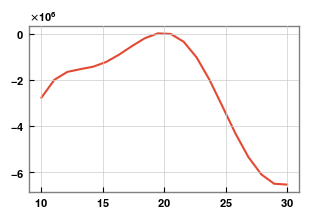

In [9]:
plt.plot(widths, likelihoods)